In [2]:
import pickle
import os
import sys
from EvaluationPlan import EvaluationPlan, Projection, Instance
from tree import Tree

print(sys.version)

3.8.19 (default, Mar 20 2024, 19:58:24) 
[GCC 11.2.0]


#### Frage 1: Eval Plan Binary ist =INEv Graph
- **Ziel**: Wir müssen prüfen, ob der Evaluation Plan den `INEv Graph` enthält.
- TODO: Öffnen Sie den Evaluation Plan Binary und überprüfen Sie den Inhalt.


**Sink ist ja dann, dass alle Results von SEQ(H,B) zur Node 10 geschickt werden?**
- **Beispiel**:
    - **Combination**: `[H, B]`
    - **Sink**: `[10]` 
        - Bedeutet dies, dass der Node 10 platziert wird?
    - **H-Instanz**: 
        - `Instance: H0; Source: [0]`
        - `SEQ(H, B) : [0, 1, 2, 3, 4, 7, 10]`
        - Bedeutet dies, dass der Weg durch das Netzwerk diesen Nodes folgt?

In [6]:
with open('EvaluationPlan', 'rb') as f:
    eval_plan = pickle.load(f)

for i in eval_plan:

    if isinstance(i,EvaluationPlan):
        print("Projections")
        for x in i.projections:
            print(x)
            print("-----------------")
        print("Instances")
        for y in i.instances:
            
            print(y)
            print("-----------------")
    elif isinstance(i,int):
        print("Number")
        print(i)
        print("-----------------")
    elif isinstance(i,dict):
        print("Dict")
        for key in i:

            print(key)
            print(i[key])
        print("-----------------")


Projections
Projection: Projection: SEQ(E, D, A, B)
- Combination: [D E B A ] 
- Sink: [2]
Instances: 
D :  
D
Instance: D8; Source: [8] 
Routing: 
SEQ(E, D, A, B) : [8, 4, 1, 0, 2] 
 
D
Instance: D9; Source: [9] 
Routing: 
SEQ(E, D, A, B) : [9, 3, 2] 
 
D
Instance: D10; Source: [10] 
Routing: 
SEQ(E, D, A, B) : [10, 4, 1, 0, 2] 
 
D
Instance: D11; Source: [11] 
Routing: 
SEQ(E, D, A, B) : [11, 4, 1, 0, 2] 
 
D
Instance: D12; Source: [12] 
Routing: 
SEQ(E, D, A, B) : [12, 5, 2] 
 
D
Instance: D13; Source: [13] 
Routing: 
SEQ(E, D, A, B) : [13, 3, 2] 
 
D
Instance: D14; Source: [14] 
Routing: 
SEQ(E, D, A, B) : [14, 3, 2] 
 
E :  
E
Instance: E6; Source: [6] 
Routing: 
SEQ(E, D, A, B) : [6, 4, 1, 0, 2] 
 
E
Instance: E11; Source: [11] 
Routing: 
SEQ(E, D, A, B) : [11, 4, 1, 0, 2] 
 
E
Instance: E12; Source: [12] 
Routing: 
SEQ(E, D, A, B) : [12, 5, 2] 
 
E
Instance: E13; Source: [13] 
Routing: 
SEQ(E, D, A, B) : [13, 3, 2] 
 
E
Instance: E14; Source: [14] 
Routing: 
SEQ(E, D, A, B) : [1

**Eventrate als ausschlaggebende Daten**

**Soll-ZUSTAND**
- Eventrate als Schlüssel für Placement:

    - Die Eventrate der Nodes ist entscheidend für die Platzierung der Nodes im Netzwerk.
    - Nur Leaf-Nodes haben aktuell eine definierte Eventrate.

- Weitergabe von Events im Netzwerk:
    - Um die Events durch das gesamte Netzwerk zu schicken, müssen auch die Nicht-Leaf-Nodes berücksichtigt werden.
- Vorschlag zur Berechnung der Eventraten:

    - Die Nicht-Leaf-Nodes erhalten die Summen der Eventraten ihrer Child-Nodes.
    - Dadurch könnte die Verteilung der Eventraten im gesamten Netzwerk erleichtert werden.
- Problem: Berechnungen in den Top-Nodes:

    - Es könnte passieren, dass alle Berechnungen in den Top-Nodes (höchste Ebenen) durchgeführt werden, was zu einer Überlastung führt.
    - Es ist unklar, wie man diese Überlastung verhindern kann, wenn Eventraten summiert werden.

**IST-ZUSTAND**
- Anmerkung zur Network-Binary-Datei:

   - Die Network-Binary-Datei enthält lediglich eine Auflistung der gesamten Eventraten.
   - Es gibt keine zugehörige Class, die das Verhalten oder die Struktur der Nodes weiter beschreibt.

[<Node.Node object at 0x7fe1f758d310>, <Node.Node object at 0x7fe1f758d340>, <Node.Node object at 0x7fe1f758d550>, <Node.Node object at 0x7fe1f758d3a0>, <Node.Node object at 0x7fe1f758d5b0>, <Node.Node object at 0x7fe1f758d670>, <Node.Node object at 0x7fe1f758d6a0>, <Node.Node object at 0x7fe1f758d760>, <Node.Node object at 0x7fe1f758d880>, <Node.Node object at 0x7fe1f758d9d0>, <Node.Node object at 0x7fe1f758dac0>, <Node.Node object at 0x7fe1f758db50>, <Node.Node object at 0x7fe1f758dbe0>, <Node.Node object at 0x7fe1f758d3d0>, <Node.Node object at 0x7fe1f758d430>]
-----------------
Graph
[0, 1, 2, 3, 4, 5, 13, 14, 6, 7, 8, 9, 10, 11, 12]
[(1, 0), (2, 0), (3, 1), (4, 2), (5, 2), (13, 3), (14, 3), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5)]


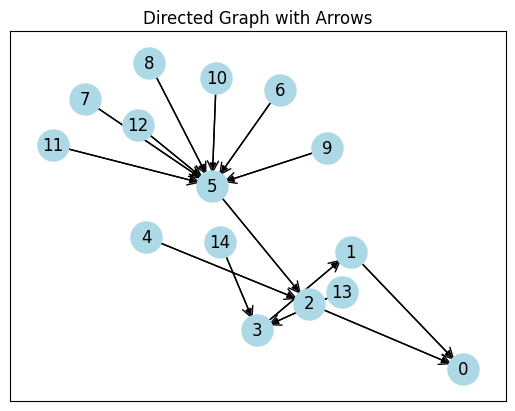

In [5]:
with open('network', 'rb') as f:
    network = pickle.load(f)
print(network)
print("-----------------")  
print("Graph")
with open('graph', 'rb') as f:
    graph = pickle.load(f)
print(graph.nodes)
print(graph.edges)


import matplotlib.pyplot as plt
import networkx as nx
# Draw the graph with arrows for directed edges
pos = nx.spring_layout(graph)  # Layout for visualization
nx.draw_networkx(graph, pos, with_labels=True, node_size=500, node_color="lightblue", arrows=True)

# Add arrows specifically for a directed graph
nx.draw_networkx_edges(graph, pos, arrowstyle="->", arrowsize=20, edge_color="black")

plt.title("Directed Graph with Arrows")
plt.show()

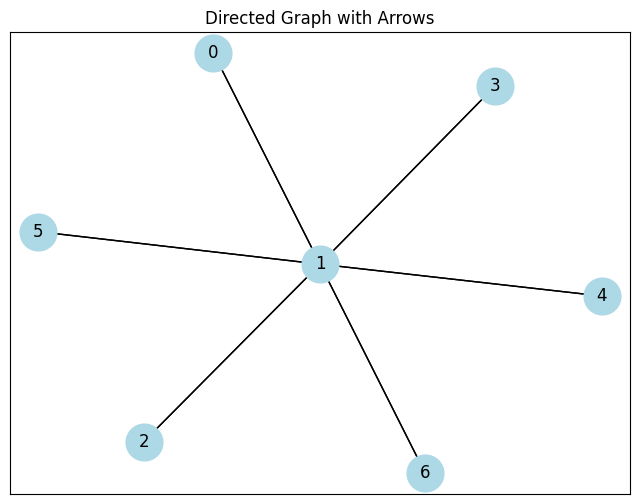

In [16]:
def visualize_graph(graph):
    plt.figure(figsize=(8, 6))
    
    # Generate a layout for the nodes
    pos = nx.spring_layout(graph)  # Positions for all nodes

    # Draw the graph, with arrows and labels
    nx.draw_networkx(graph, pos, with_labels=True, node_size=700, node_color='lightblue', arrows=True)
    
    # Explicitly draw the edges with arrows
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrowstyle="->", arrowsize=20)
    
    plt.title("Directed Graph with Arrows")
    plt.show()

# Assuming `root` is the starting node and `graph` is generated
with open('graph', 'rb') as f:
    graph = pickle.load(f)
visualize_graph(graph)

### Projektstruktur und Dateifunktionen

Ist das Placement von Operatoren nur in der Datei computePlacementCost_aug.py implementiert?
Beschäftigen sich die anderen Dateien hauptsächlich mit Netzwerk-Generierung, Projektionen, Abfragen und Selektivitäten?
Oder gibt es auch in anderen Dateien Platzierungslogik für Operatoren, die implementiert ist?
Beispiel: In [computePlanCosts_aug.py](computePlanCosts_aug.py) ab Zeile 76.
Wo genau finde ich das Placement der Operatorena an Nodes?


### Einschränkung der Node-Projektionen
Wenn ich einschränken will, welche Nodes Projektionen berechnen können, mache ich das in der computePlancosts_aug.py über die Variable MSPlacements in der Main-Methode, die dann in die EvalPlan Binary geschrieben wird? Stimmt das so?


### Bedeutung von 'etb'
Wofür steht die Abkürzung 'etb'?

### Key Error bei Simulationen
Hin und wieder kriege ich bei den Simulationen einen "Key Error". Das passiert selten, aber ich hab den Verdacht, dass es damit zu tun hat, dass die Binaries erstellt und genutzt werden, bevor sie komplett im Speicher verfügbar sind. Könnte das sein?
 

### Was ist Efficiency bei der csv?
So wie ich das gesehen habe, ist die Efficiency der Longest Path, welcher im Netzwerk zurückgelegt wird?

In [1]:
"Aus der computePlanCosts_aug.py Zeile 183"
#myResult = [ID, mycosts,  Filters, networkParams[3], networkParams[0], networkParams[2], len(wl), combigenParams[3], selectivityParams[0], selectivityParams[1], combigenParams[1], longestPath, totaltime, hoplatency, float(max(list(dependencies.values()))/2), totalLatencyRatio, ccosts[0], lowerBound / ccosts[0], networkParams[1]]
schema = ["ID", "TransmissionRatio", "FilterUsed", "Nodes", "EventSkew", "EventNodeRatio", "WorkloadSize", "NumberProjections", "MinimalSelectivity", "MedianSelectivity","CombigenComputationTime", "Efficiency", "PlacementComputationTime", "HopCount", "Depth", "ProcessingLatencyRatio", "CentralTransmission", "LowerBound", "EventTypes"] 

from placement_aug import NEWcomputeMSplacementCosts_Path

"""
def NEWcomputeMSplacementCosts_Path(projection, sourcetypes, destinationtypes, noFilter): #for PathVariant - fix generate EvalPlan
    costs = 0
    destinationNodes = []     

    for etype in destinationtypes:
        for etb in IndexEventNodes[etype]:
            destinationNodes += getNodes(etb)            
            
    newInstances = [] #!
    longestPath = 0        
    etype = sourcetypes[0]
    routingInfo = []
        
    for etb in IndexEventNodes[etype]: #parallelize
        newInstance = False   
        MydestinationNodes = list(set(destinationNodes).difference(set(getNodes(etb)))) #only consider nodes that do not already hold etb
        if MydestinationNodes:     
                for dest in MydestinationNodes:
                   if not dest in getNodes(etb):  
                        #are there ms nodes which did not receive etb before
                        node = findBestSource(getNodes(etb), [dest]) #best source is node closest to a node of destinationNodes
                        
                        shortestPath = nx.shortest_path(G, dest, node, method='dijkstra') 
                        if len(shortestPath) > longestPath:
                            longestPath = len(shortestPath)
                    
                        if etype in projFilterDict.keys() and  getMaximalFilter(projFilterDict, etype, noFilter): #case input projection has filter
                            mycosts =  len(shortestPath) * getDecomposedTotal(getMaximalFilter(projFilterDict, etype, noFilter), etype)                    
                            if len(IndexEventNodes[etype]) > 1 : # filtered projection has ms placement
                                 partType = returnPartitioning(etype, mycombi[etype])[0]                     
                                 mycosts -= len(shortestPath)  * rates[partType] * singleSelectivities[getKeySingleSelect(partType, etype)] * len(IndexEventNodes[etype])
                                 mycosts += len(shortestPath)  * rates[partType] * singleSelectivities[getKeySingleSelect(partType, etype)] 
                        elif len(etype) == 1:
                            mycosts = len(shortestPath) * rates[etype]
                        else:                    
                            num = NumETBsByKey(etb, etype)                 
                            mycosts = len(shortestPath) *  projrates[etype][1] * num          
                        costs +=  mycosts     

                        routingInfo.append(shortestPath)    # destinations have different sources
                    
                        for routingNode in shortestPath:
                            if not routingNode in getNodes(etb):
                                setEventNodes(routingNode, etb)  
                        newInstance = True        
        if newInstance:
            myInstance = Instance(etype, etb, [node], {projection: routingInfo}) #! #append routing tree information for instance/etb                    
            newInstances.append(myInstance) #!        
    return costs, longestPath, newInstances
"""

'Aus der computePlanCosts_aug.py Zeile 183'

### ETBgen.py und die Class Tuple und ETB
Wozu wird die genutzt? Habe nicht die Verwendung gefunden